In [ ]:
# source: https://www.robotswillkillusall.org/posts/mpl-scatterplot-colorbar.html

In [ ]:
# In this notebook, I plot how z changes with x and y in a scatter plot by color coding the z.
# At the same time I want to I want to show the density.
# The workflow is to use sns.jointplot to plot and the remove the plot.
# Because sns.jointplot return an ojbect. The object has a data named fig, which has the three axes object.
# One key part is to create a continue cmap and normalized it value it represents.
  # the other is to get the the axes from the object returned from sns.jointplot and then plot the colorbar

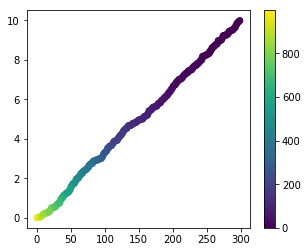

In [3]:
import matplotlib
import matplotlib.pyplot as plt
import random

# We have three dimensions of data. x and y will be plotted on the x and y axis, while z will 
# be represented with color.
# If z is a numpy array, matplotlib refuses to plot this.
x = list(range(300))
y = sorted([random.random()*10 for i in range(300)])
z = list(reversed([i**3 for i in y]))

# cmap will generate a tuple of RGBA values for a given number in the range 0.0 to 1.0 
# (also 0 to 255 - not used in this example).
# To map our z values cleanly to this range, we create a Normalize object.
cmap = matplotlib.cm.get_cmap('viridis')
normalize = matplotlib.colors.Normalize(vmin=min(z), vmax=max(z))
colors = [cmap(normalize(value)) for value in z]

fig, ax = plt.subplots(figsize=(5,4))
ax.scatter(x, y, color=colors)

# Optionally add a colorbar
cax, _ = matplotlib.colorbar.make_axes(ax)
cbar = matplotlib.colorbar.ColorbarBase(cax, cmap=cmap, norm=normalize)
plt.show()

/usr/local/anaconda/lib/python3.6/site-packages/seaborn/axisgrid.py:2262: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


Text(0.5, 0, '          Z value')

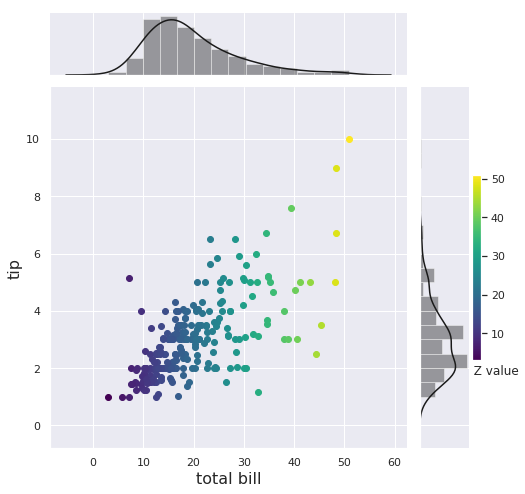

In [14]:
import seaborn as sns
from itertools import product
sns.set(style="darkgrid")

tips = sns.load_dataset("tips")
color = sns.color_palette()[5]
g = sns.jointplot("total_bill", "tip", data=tips, kind="reg", stat_func=None,
                  xlim=(0, 60), ylim=(0, 12), color='k', size=7)

#Clear the axes containing the scatter plot
g.ax_joint.cla()

cmap = matplotlib.cm.get_cmap('viridis')
normalize = matplotlib.colors.Normalize(vmin=tips.total_bill.min(), vmax=tips.total_bill.max())
colors = [cmap(normalize(value)) for value in tips.total_bill]


#Plot each individual point separately
for i,row in enumerate(tips.values):
    g.ax_joint.plot(row[0], row[1], color=colors[i], marker="o")

g.set_axis_labels('total bill', 'tip', fontsize=16)

cax, _ = matplotlib.colorbar.make_axes(g.fig.axes[2])
cbar = matplotlib.colorbar.ColorbarBase(cax, cmap=cmap, norm=normalize)
cbar.ax.set_xlabel('          Z value', rotation=0)

# plt.show()